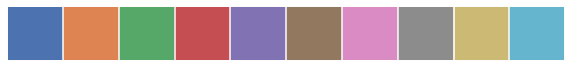

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set('talk')
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'large',
          'figure.figsize': (16, 9),
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)
import json
from pandas.io.json import json_normalize
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [5]:
models = ['resnet', 'densenet', 'b-resnet', 'b-densenet', 'msdnet']

platforms = {
    'gpu' : {
        'resnet': pd.read_csv('resnet_conv_inference_test.csv', index_col=0),
        'densenet': pd.read_csv('dense_conv_inference_test.csv', index_col=0),
        'b-resnet': pd.read_csv('resnet101_all_inference_test.csv', index_col=0),
        'b-densenet': pd.read_csv('densenet_all_inference_test.csv', index_col=0),
        'msdnet' : pd.read_csv('msdnet_inference_test.csv', index_col=0)
    },
    'jetson' : {
        'resnet': pd.read_csv('jetson/jetson-resnet_inference_test.csv', index_col=0),
        'densenet': pd.read_csv('jetson/jetson-densenet_inference_test.csv', index_col=0),
        'b-resnet': pd.read_csv('jetson/jetson-b-resnet1_inference_test.csv', index_col=0),
        'b-densenet': pd.read_csv('jetson/jetson-b-densenet1_inference_test.csv', index_col=0),
        'msdnet' : pd.read_csv('jetson/jetson-msdnet_inference_test.csv', index_col=0)
    },
    'nuc' : {
        'resnet': pd.read_csv('nuc/nuc-resnet_inference_test.csv', index_col=0),
        'densenet': pd.read_csv('nuc/nuc-densenet_inference_test.csv', index_col=0),
        'b-resnet': pd.read_csv('nuc/nuc-b-resnet_inference_test.csv', index_col=0),
        'b-densenet': pd.read_csv('nuc/nuc-b-densenet_inference_test.csv', index_col=0),
        'msdnet' : pd.read_csv('nuc/nuc-msdnet_inference_test.csv', index_col=0)
    }
}

In [29]:
platforms['nuc']['densenet'].mean()

threshold        0.500000
prediction      48.733000
target          49.500000
correct          0.852800
score_margin     0.813249
time             0.068603
dtype: float64

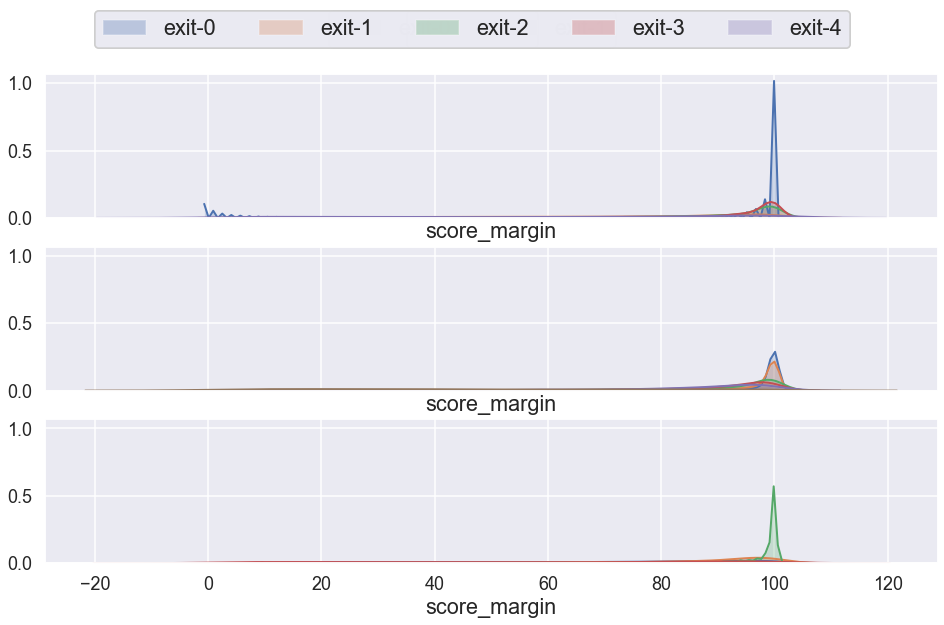

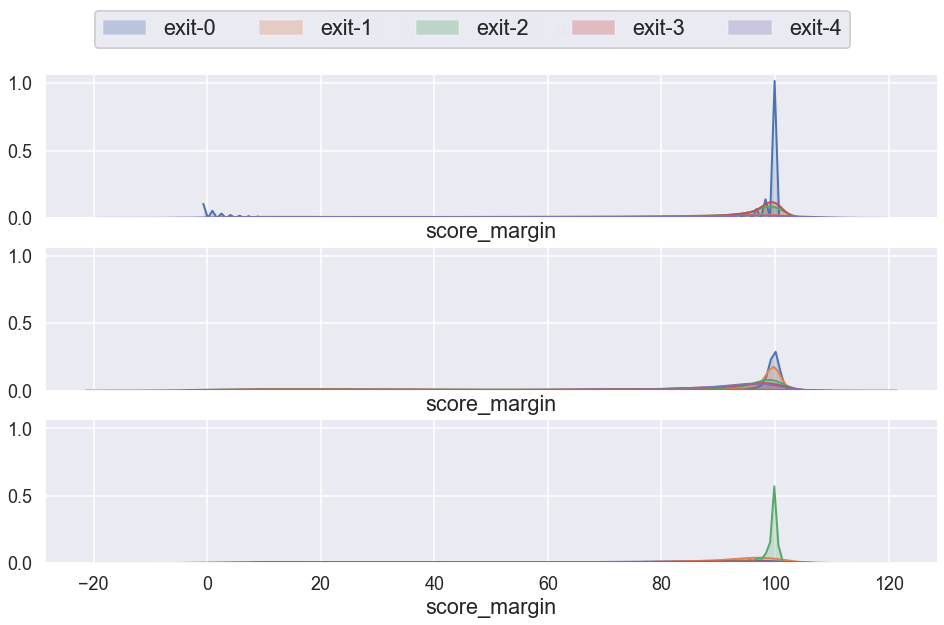

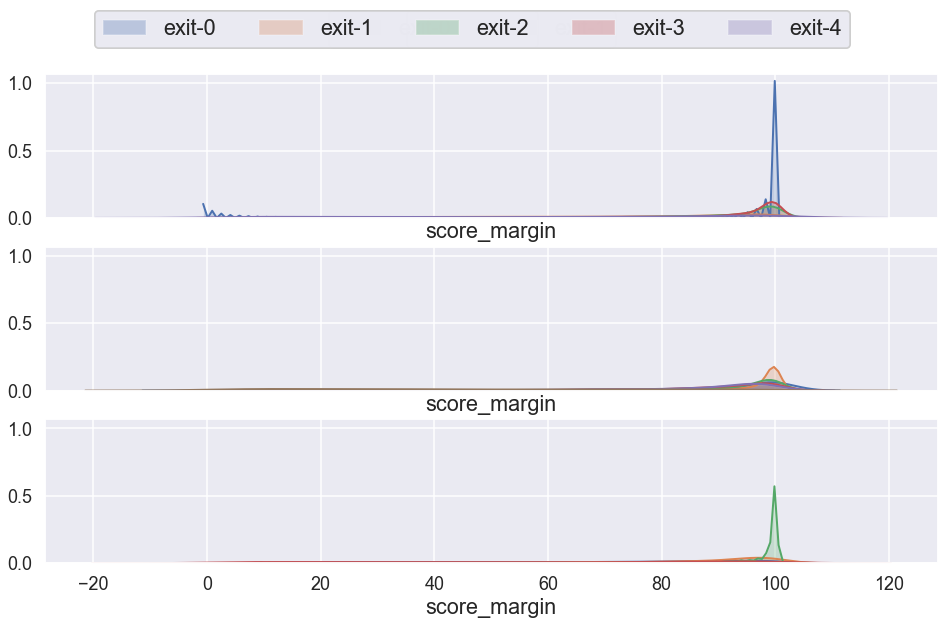

In [6]:
for platform in platforms:
    fig, axes = plt.subplots(3,1, figsize=(16,9), sharex=True, sharey=True)
    kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2, 'shade': True}, hist=False, kde=True, bins=100)
    for i, net in enumerate(platforms[platform]):
        for score in platforms[platform][net].groupby('exit').score_margin:
            sns.distplot(score[1]*100, ax=axes[i%3], **kwargs)
        fig.legend(['exit-{}'.format(x) for x in range(5)], loc='upper center', #bbox_to_anchor=(0.5, 1.1),
                  fancybox=True, shadow=False, ncol=5, fontsize='large')


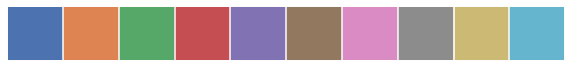

In [7]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [8]:
current_palette.as_hex()

['#4c72b0',
 '#dd8452',
 '#55a868',
 '#c44e52',
 '#8172b3',
 '#937860',
 '#da8bc3',
 '#8c8c8c',
 '#ccb974',
 '#64b5cd']

In [9]:
x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
cols=["Mean Accuracy", "Mean Time", "Std. Accuracy", "Std. Time"]
stats = {platform : { model: pd.DataFrame(
    columns=cols) for model in models[2:]} for platform in platforms}
stats

{'gpu': {'b-resnet': Empty DataFrame
  Columns: [Mean Accuracy, Mean Time, Std. Accuracy, Std. Time]
  Index: [], 'b-densenet': Empty DataFrame
  Columns: [Mean Accuracy, Mean Time, Std. Accuracy, Std. Time]
  Index: [], 'msdnet': Empty DataFrame
  Columns: [Mean Accuracy, Mean Time, Std. Accuracy, Std. Time]
  Index: []}, 'jetson': {'b-resnet': Empty DataFrame
  Columns: [Mean Accuracy, Mean Time, Std. Accuracy, Std. Time]
  Index: [], 'b-densenet': Empty DataFrame
  Columns: [Mean Accuracy, Mean Time, Std. Accuracy, Std. Time]
  Index: [], 'msdnet': Empty DataFrame
  Columns: [Mean Accuracy, Mean Time, Std. Accuracy, Std. Time]
  Index: []}, 'nuc': {'b-resnet': Empty DataFrame
  Columns: [Mean Accuracy, Mean Time, Std. Accuracy, Std. Time]
  Index: [], 'b-densenet': Empty DataFrame
  Columns: [Mean Accuracy, Mean Time, Std. Accuracy, Std. Time]
  Index: [], 'msdnet': Empty DataFrame
  Columns: [Mean Accuracy, Mean Time, Std. Accuracy, Std. Time]
  Index: []}}

In [10]:

for platform in stats:
    for model in stats[platform]:
        for treshold in platforms[platform][model].groupby(['threshold']):
            mean = treshold[1].mean()
            std = treshold[1].std()
            stats[platform][model] = stats[platform][model].append(dict(zip(cols, [mean.correct, mean.time, std.correct, std.time])),ignore_index=True)
        stats[platform][model] = stats[platform][model].set_index(pd.Index(x))

In [11]:
stats

{'gpu': {'b-resnet':      Mean Accuracy  Mean Time  Std. Accuracy  Std. Time
  0.1         0.6458   0.017376       0.478318   0.016422
  0.2         0.7352   0.021034       0.441271   0.012512
  0.3         0.7884   0.023683       0.408484   0.013815
  0.4         0.8226   0.026222       0.382045   0.014730
  0.5         0.8488   0.028200       0.358280   0.015086
  0.6         0.8662   0.029933       0.340471   0.015105
  0.7         0.8754   0.032040       0.330298   0.015258
  0.8         0.8842   0.033742       0.320017   0.014821
  0.9         0.8902   0.036733       0.312672   0.014237,
  'b-densenet':      Mean Accuracy  Mean Time  Std. Accuracy  Std. Time
  0.1         0.6566   0.022062       0.474891   0.015590
  0.2         0.7248   0.025096       0.446660   0.010649
  0.3         0.7662   0.027767       0.423289   0.012752
  0.4         0.7962   0.030118       0.402862   0.014120
  0.5         0.8236   0.032195       0.381198   0.014968
  0.6         0.8410   0.034569       

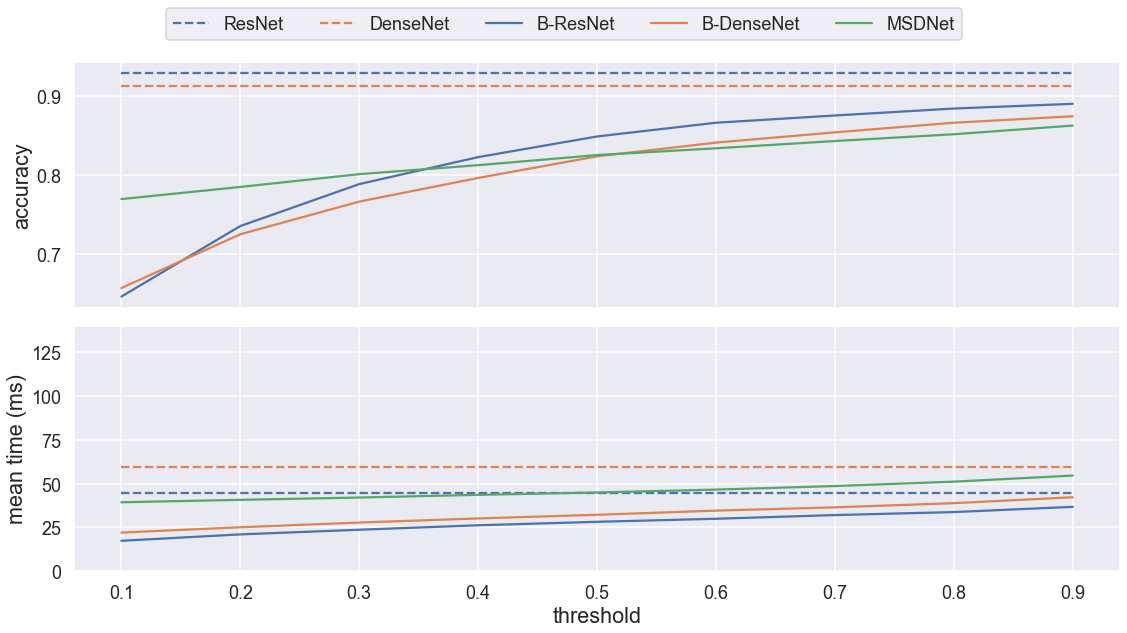

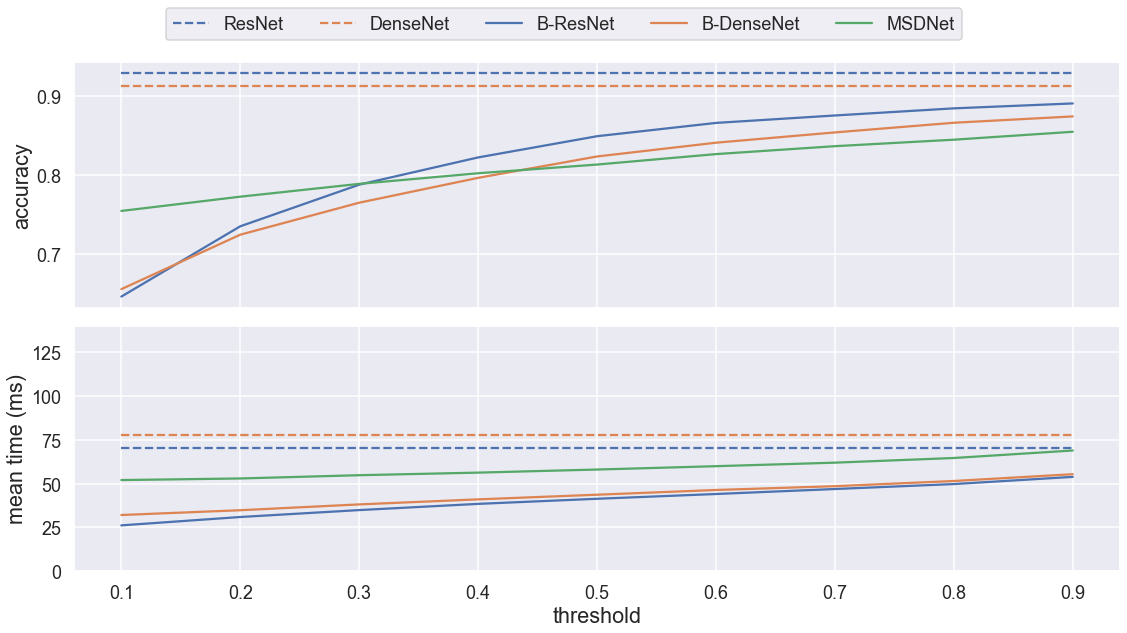

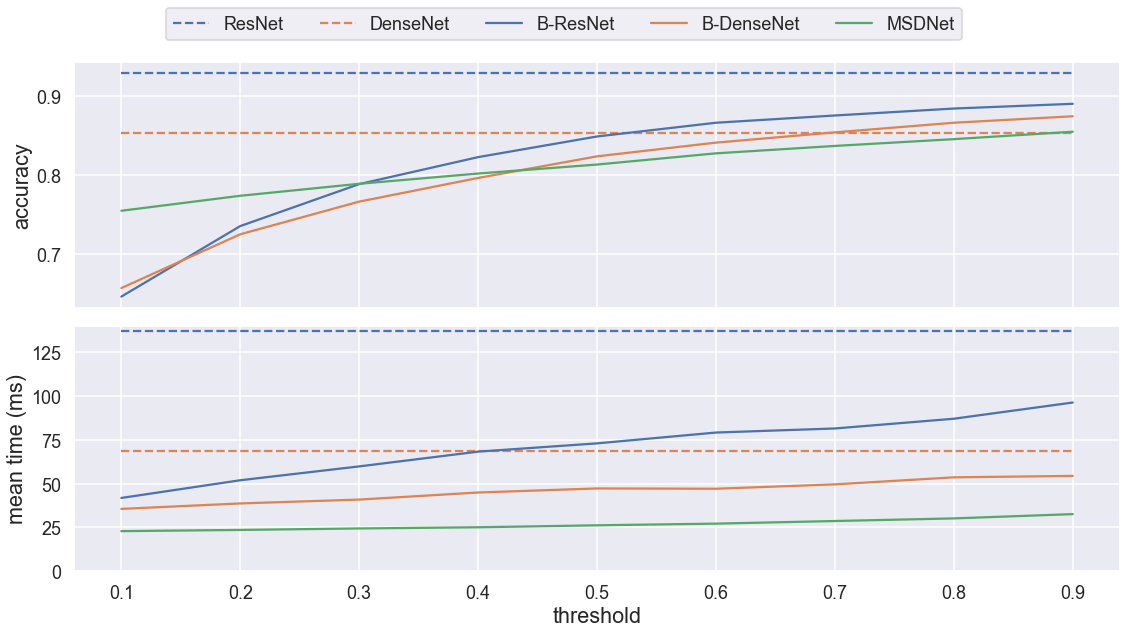

In [12]:
for platform in platforms:
    fig, axes = plt.subplots(2,1, sharex=True)
    sns.lineplot(x=x, y=platforms[platform]['resnet'].correct.mean()*np.ones(9), ax=axes[0], color=current_palette[0])
    sns.lineplot(x=x, y=platforms[platform]['resnet'].time.mean()*np.ones(9)*1000, ax=axes[1], color=current_palette[0])

    sns.lineplot(x=x, y=platforms[platform]['densenet'].correct.mean()*np.ones(9), ax=axes[0],  color=current_palette[1])
    sns.lineplot(x=x, y=platforms[platform]['densenet'].time.mean()*np.ones(9)*1000, ax=axes[1],  color=current_palette[1])

    sns.lineplot(data=stats[platform]['b-resnet']['Mean Accuracy'], ax=axes[0], color=current_palette[0])
    sns.lineplot(data=stats[platform]['b-resnet']['Mean Time']*1000, ax=axes[1], color=current_palette[0])

    sns.lineplot(data=stats[platform]['b-densenet']['Mean Accuracy'], ax=axes[0], color=current_palette[1])
    sns.lineplot(data=stats[platform]['b-densenet']['Mean Time']*1000, ax=axes[1], color=current_palette[1])

    sns.lineplot(data=stats[platform]['msdnet']['Mean Accuracy'], ax=axes[0], color=current_palette[2])
    sns.lineplot(data=stats[platform]['msdnet']['Mean Time']*1000, ax=axes[1], color=current_palette[2])

    axes[0].set_ylabel('accuracy')
    axes[1].set_ylabel('mean time (ms)')
    plt.xlabel('threshold')



    axes[0].lines[0].set_linestyle("--")

    axes[1].lines[0].set_linestyle("--")

    axes[0].lines[1].set_linestyle("--")

    axes[1].lines[1].set_linestyle("--")

    axes[1].set_ylim([0,140])

    fig.legend([ 'ResNet', 'DenseNet', 'B-ResNet', 'B-DenseNet', 'MSDNet'], ncol=5, loc="upper center", fontsize='medium')
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)
    plt.savefig(platform + '_inference.png')

In [13]:
time_thresholds = np.arange(0.01, 0.14, 0.003)
time_threshold_stats = {
    platform : { x : {t : {} for t in time_thresholds*1000} for x in models[2:] } for platform in platforms 
}
time_threshold_stats

{'gpu': {'b-resnet': {10.0: {},
   13.000000000000002: {},
   16.0: {},
   19.000000000000004: {},
   22.000000000000007: {},
   25.000000000000004: {},
   28.000000000000004: {},
   31.000000000000007: {},
   34.00000000000001: {},
   37.000000000000014: {},
   40.00000000000001: {},
   43.00000000000001: {},
   46.000000000000014: {},
   49.000000000000014: {},
   52.000000000000014: {},
   55.000000000000014: {},
   58.000000000000014: {},
   61.00000000000002: {},
   64.00000000000001: {},
   67.00000000000001: {},
   70.00000000000001: {},
   73.00000000000001: {},
   76.00000000000001: {},
   79.00000000000001: {},
   82.00000000000001: {},
   85.00000000000001: {},
   88.00000000000003: {},
   91.00000000000003: {},
   94.00000000000001: {},
   97.00000000000001: {},
   100.00000000000001: {},
   103.00000000000003: {},
   106.00000000000003: {},
   109.00000000000003: {},
   112.00000000000003: {},
   115.00000000000003: {},
   118.00000000000003: {},
   121.00000000000003: {},

In [14]:
for platform in platforms:
    for threshold in time_thresholds:
        for model in models[2:]:
            result = stats[platform][model].loc[stats[platform][model]['Mean Time'] < threshold].max()
            if not np.isnan(result).any():
                time_threshold_stats[platform][model][threshold*1000]['accuracy'] = result['Mean Accuracy']
                time_threshold_stats[platform][model][threshold*1000]['time'] = result['Mean Time']*1000
            else:
                time_threshold_stats[platform][model][threshold*1000] = None

In [15]:
print(platforms)      
delay_threshold = {
    platform : {
        model : pd.DataFrame(time_threshold_stats[platform][model]).T  for model in models[2:]   
    } for platform in platforms
}
delay_threshold

{'gpu': {'resnet':       threshold                    exit  prediction  target  correct  \
0           0.5  conventional inference           0       0     True   
1           0.5  conventional inference           0       0     True   
2           0.5  conventional inference           0       0     True   
3           0.5  conventional inference           0       0     True   
4           0.5  conventional inference           0       0     True   
...         ...                     ...         ...     ...      ...   
4995        0.5  conventional inference          99      99     True   
4996        0.5  conventional inference          99      99     True   
4997        0.5  conventional inference          99      99     True   
4998        0.5  conventional inference          99      99     True   
4999        0.5  conventional inference          99      99     True   

      score_margin      time  
0         0.999941  1.029331  
1         0.999995  0.044082  
2         0.999996  0.0

{'gpu': {'b-resnet':       accuracy     time
  10.0      None     None
  13.0      None     None
  16.0      None     None
  19.0    0.6458  17.3762
  22.0    0.7352  21.0335
  25.0    0.7884  23.6829
  28.0    0.8226  26.2216
  31.0    0.8662  29.9326
  34.0    0.8842  33.7423
  37.0    0.8902  36.7331
  40.0    0.8902  36.7331
  43.0    0.8902  36.7331
  46.0    0.8902  36.7331
  49.0    0.8902  36.7331
  52.0    0.8902  36.7331
  55.0    0.8902  36.7331
  58.0    0.8902  36.7331
  61.0    0.8902  36.7331
  64.0    0.8902  36.7331
  67.0    0.8902  36.7331
  70.0    0.8902  36.7331
  73.0    0.8902  36.7331
  76.0    0.8902  36.7331
  79.0    0.8902  36.7331
  82.0    0.8902  36.7331
  85.0    0.8902  36.7331
  88.0    0.8902  36.7331
  91.0    0.8902  36.7331
  94.0    0.8902  36.7331
  97.0    0.8902  36.7331
  100.0   0.8902  36.7331
  103.0   0.8902  36.7331
  106.0   0.8902  36.7331
  109.0   0.8902  36.7331
  112.0   0.8902  36.7331
  115.0   0.8902  36.7331
  118.0   0.8902  3

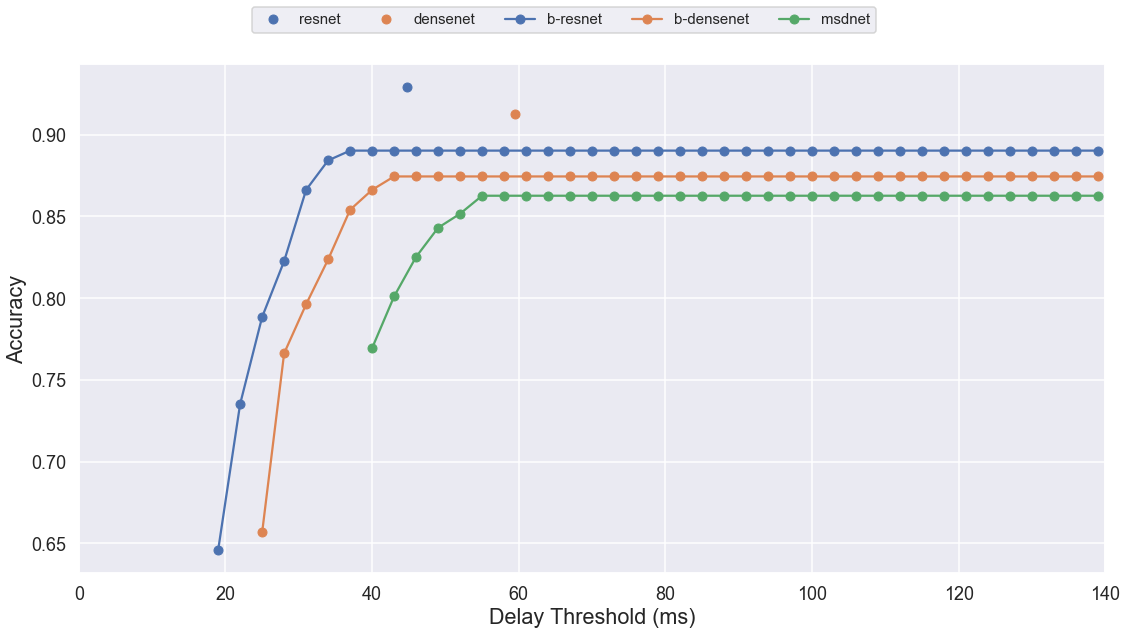

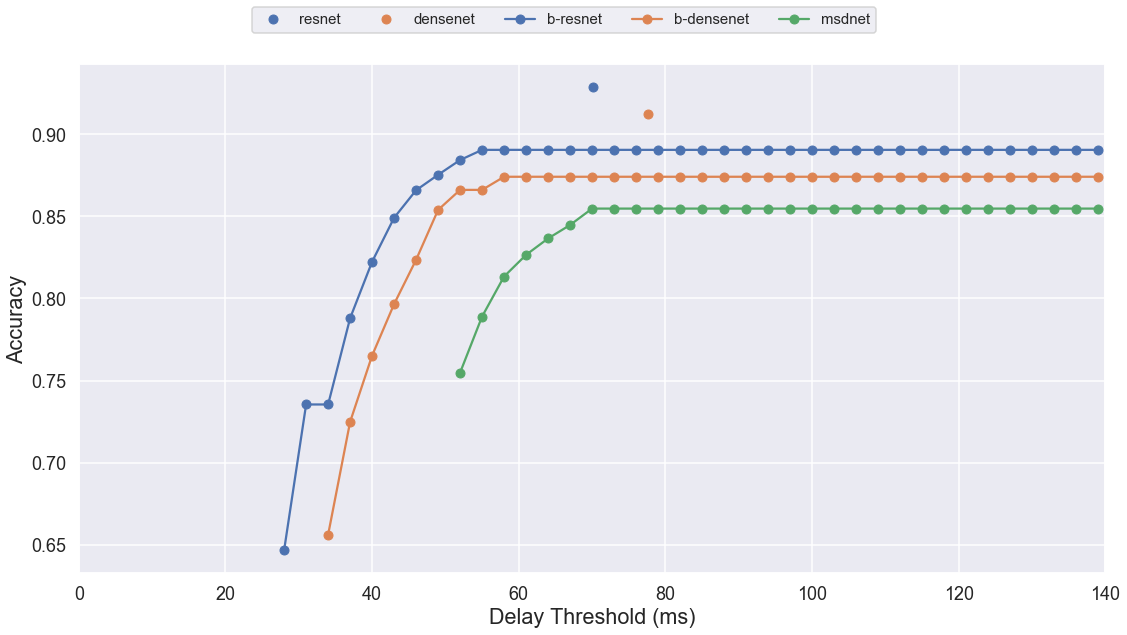

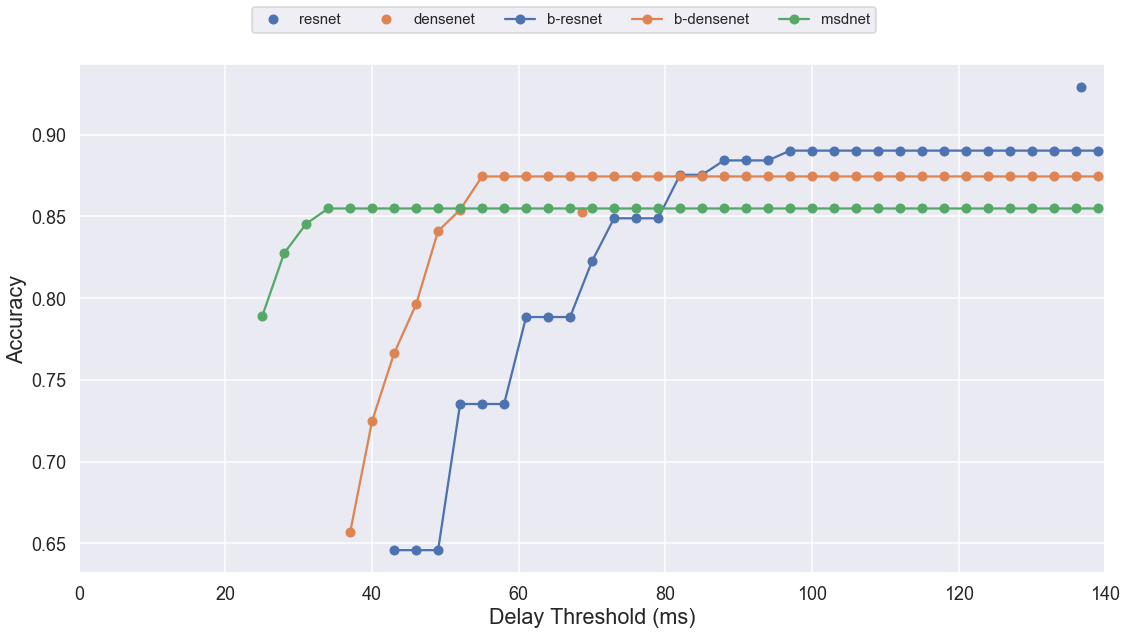

In [18]:
for platform in platforms:
    fig, axes = plt.subplots(1,1)
    point1 = axes.plot(platforms[platform]['resnet'].time.mean()*1000,platforms[platform]['resnet'].correct.mean(), marker='o', color=current_palette[0], linestyle = 'None') 
    point2 = axes.plot(platforms[platform]['densenet'].time.mean()*1000,platforms[platform]['densenet'].correct.mean(),marker='o',  color=current_palette[1], linestyle = 'None',)                  
    for i, model in enumerate(models[2:]):
        line1 = axes.plot(delay_threshold[platform][model]['accuracy'], marker='o', color=current_palette[i])


    fig.legend(models, ncol=5, loc="upper center", fontsize='small', numpoints=1)
    axes.set(xlabel='Delay Threshold (ms)', ylabel='Accuracy')
    axes.set_xlim([0,140])
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)
    plt.savefig(platform + '_delay_threshold.png')

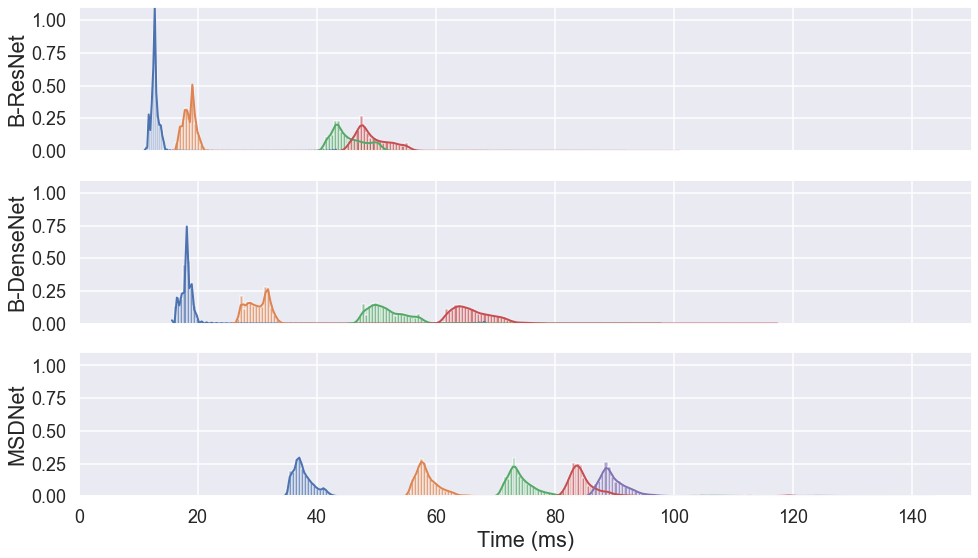

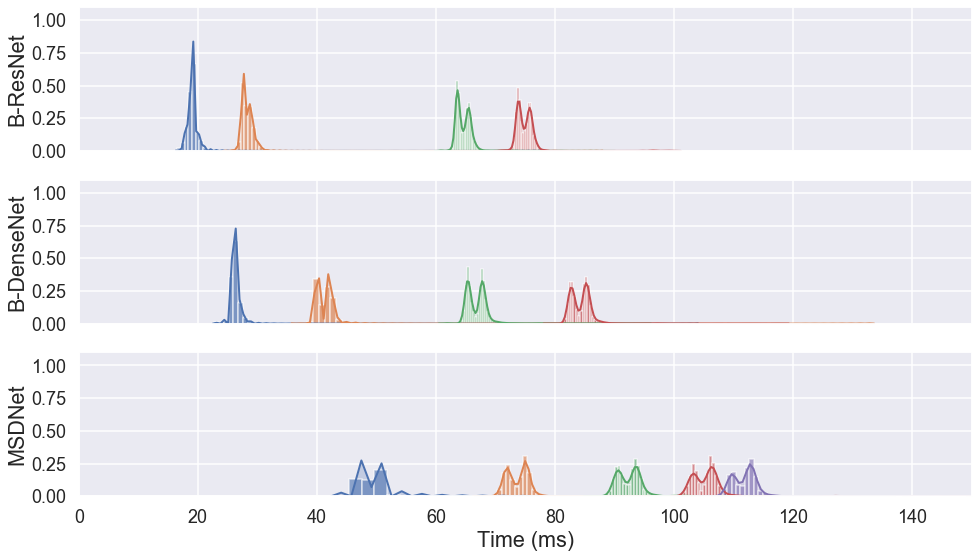

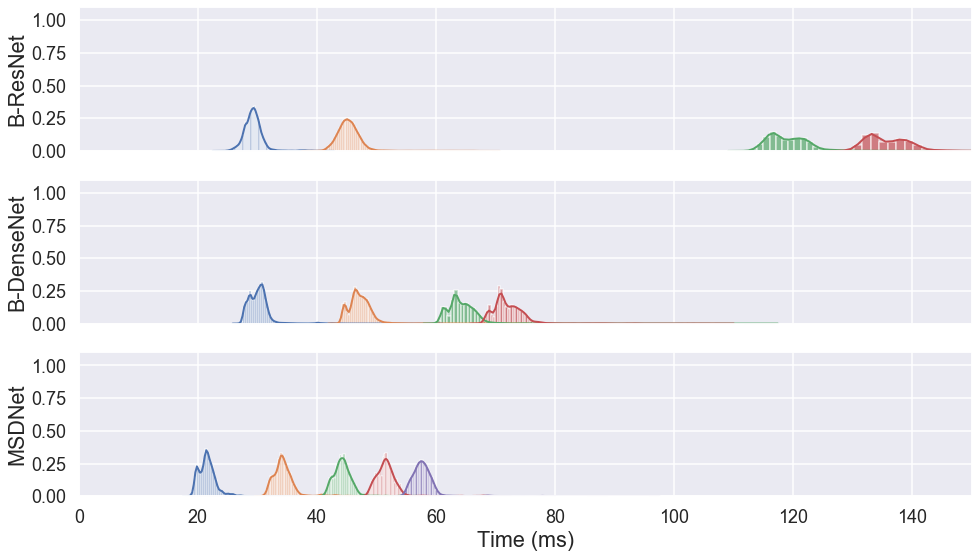

In [19]:
for platform in platforms:
    kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2, 'shade': True}, hist=True, kde=True, bins=100)
    fig, axes = plt.subplots(3,1, sharex=True, sharey=True)
    for exit in range(4):
        sns.distplot(platforms[platform]['b-resnet'].loc[platforms[platform]['b-resnet'].exit==exit].time[1:]*1000,ax=axes[0], **kwargs)
        sns.distplot(platforms[platform]['b-densenet'].loc[platforms[platform]['b-densenet'].exit==exit].time[1:]*1000,ax=axes[1], **kwargs)
    for exit in range(5):
        sns.distplot(platforms[platform]['msdnet'].loc[platforms[platform]['msdnet'].exit==exit].time[1:]*1000,ax=axes[2], **kwargs)

    labels = ['B-ResNet', 'B-DenseNet', 'MSDNet']
    for ax, label in zip(axes.flat, labels):
        ax.set(xlabel='Time (ms)', ylabel=label)
        ax.label_outer()
        ax.set_xlim([0,150])
        ax.set_ylim([0,1.1])
        ax.set_yticks([0,0.25,0.5,0.75,1])
    plt.savefig(platform + '_inference_time_distribution.png')

In [23]:
#ee_res.exit= ee_res.exit.astype('int')
d = {    'ResNet': platforms['gpu']['b-resnet'].groupby(['threshold', 'exit', 'correct']).size(),
         'DenseNet': platforms['gpu']['b-densenet'].groupby(['threshold', 'exit', 'correct']).size(),
         'MSDNet': platforms['gpu']['msdnet'].groupby(['threshold', 'exit', 'correct']).size()   }
df = pd.DataFrame(d)

df = df / 5000
df

ResNet  DenseNet  MSDNet
threshold exit correct                          
0.1       0    False    0.2498    0.2608  0.2040
               True     0.4098    0.4786  0.7370
          1    False    0.0816    0.0672  0.0228
               True     0.1688    0.1578  0.0282
          2    False    0.0194    0.0138  0.0034
...                        ...       ...     ...
0.9       2    True     0.4640    0.2234  0.0686
          3    False    0.0788    0.0876  0.0106
               True     0.0992    0.1376  0.0256
          4    False       NaN       NaN  0.0724
               True        NaN       NaN  0.0522

[88 rows x 3 columns]

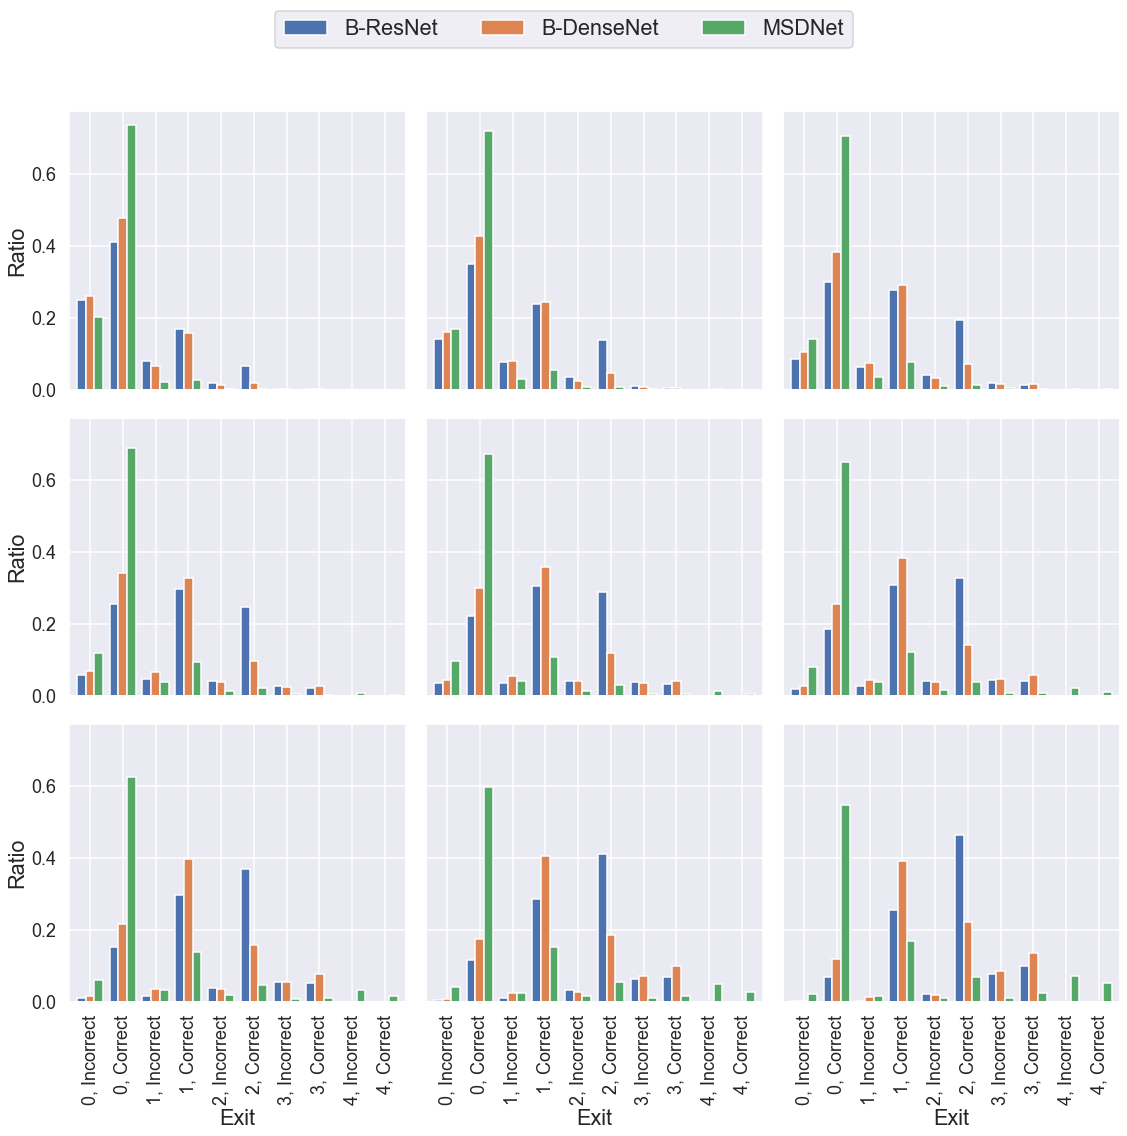

In [24]:
width=0.8
x=10
n = np.arange(x)
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(16,16))
for i, (ax, data) in enumerate(zip(axes.flat, df.groupby('threshold'))):
    #ax.set_title('Threshold {:0.1f}'.format(data[0]))
    xx = x + width/2
    #print(data[1].get('DenseNet'))
    #ax.bar(xx, np.array(data[1]['ResNet']))
    data[1].plot(kind='bar', ax=ax, legend=False, width=width)
    ax.label_outer()
    #i.xtickslabels([1, 2, 3, 4])
    ax.set(xlabel='Exit', ylabel='Ratio', xticks=np.arange(10))
    ax.set_xticklabels(list(np.array([['{}, Incorrect'.format(exit), '{}, Correct'.format(exit)] for exit in np.arange(5)]).flatten()))

    #for tick in ax.get_xticklabels():
    #   tick.set_rotation(90)
        
    #ax2 = ax.secondary_xaxis('bottom')
    #ax2.xaxis.set_ticks([1,3,5,7,9])
    #ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
    #ax.spines['bottom'].set_position(('outward', 36))

    #ax2.label_outer()
fig.legend(['B-ResNet', 'B-DenseNet', 'MSDNet'], ncol=3, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.savefig('inference_threshold_test.PNG')

In [ ]:
mean

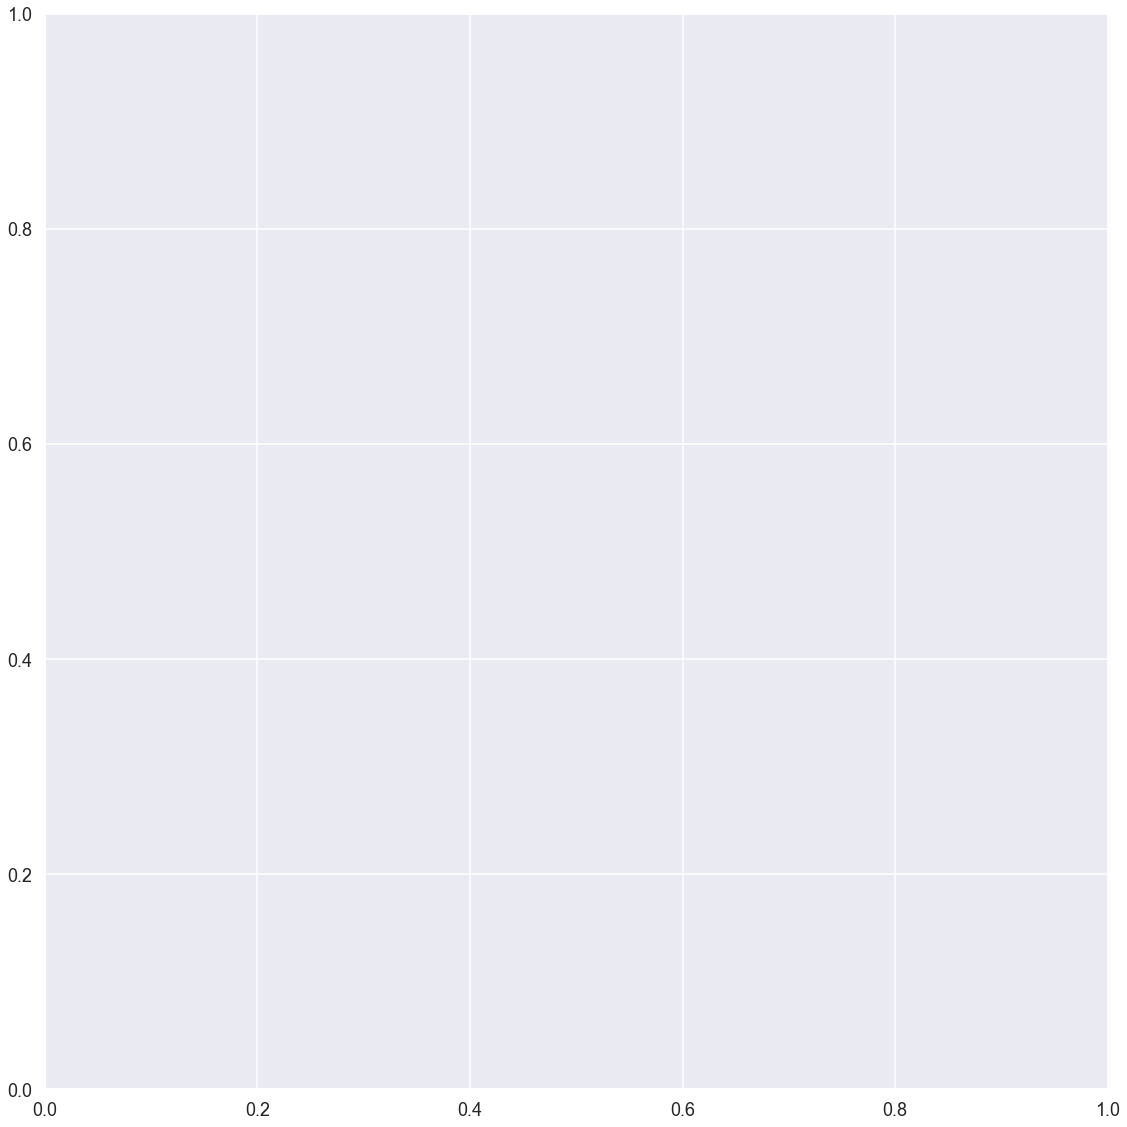

In [25]:
width=0.8
x=10
n = np.arange(x)
fig, axes = plt.subplots(1,1, sharex=True, sharey=True, figsize=(16,16))
for i, (data) in enumerate(df.groupby('threshold')):
    #ax.set_title('Threshold {:0.1f}'.format(data[0]))
    xx = x + width/2
    #print(data[1].get('DenseNet'))
    #ax.bar(xx, np.array(data[1]['ResNet']))
    data[1].plot(kind='bar', ax=ax, legend=False, width=width)
    #ax.label_outer()
    #i.xtickslabels([1, 2, 3, 4])
    ax.set(xlabel='Exit', ylabel='Ratio', xticks=np.arange(10))
    ax.set_xticklabels(list(np.array([['{}, Incorrect'.format(exit), '{}, Correct'.format(exit)] for exit in np.arange(5)]).flatten()))

    #for tick in ax.get_xticklabels():
    #   tick.set_rotation(90)
        
    #ax2 = ax.secondary_xaxis('bottom')
    #ax2.xaxis.set_ticks([1,3,5,7,9])
    #ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
    #ax.spines['bottom'].set_position(('outward', 36))

    #ax2.label_outer()
#fig.legend(['B-ResNet', 'B-DenseNet', 'MSDNet'], ncol=3, loc='upper center')
fig.tight_layout()
#fig.subplots_adjust(top=0.90)
#plt.savefig('inference_threshold_test.PNG')

In [ ]:
np.arange(1,6)*0.5

In [ ]:
list(np.array([['Correct {}'.format(exit), 'Incorrect {}'.format(exit)] for exit in np.arange(5)]).flatten())

In [ ]:
df['ResNet']

In [ ]:
models = ['b-densenet', 'b-resnet', 'msdnet']
df = pd.DataFrame({
        'model':models,
        'exit-0':np.random.randn(3),
        'score2':np.random.randn(3),

                   })

df